# Fast Food Data 02
Expenditure on Fast Food and its relation to number of Fast food restaurants

**Author:** Ioakeim Ioakeim


In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
path_input = '00_data_input'
path_atlas = os.path.join(path_input, 'food_atlas.xls')
path_inter = '02_data_intermediate'
path_fast_food_rest_cnt = os.path.join(path_inter, 'fast_food_restaurant_count_refined_data.csv')
path_fast_food_expenditure = os.path.join(path_inter, 'fast_food_expenditure_refined_data.csv')
path_obesity = os.path.join(path_inter, 'obesity_refined_data.csv')

**Problem: Expenditure is on a state level**

In [36]:
df_restaurants = pd.read_excel(path_atlas, sheet_name='RESTAURANTS')
df_fast_food = df_restaurants[['State', 'PC_FFRSALES07', 'PC_FFRSALES12' ]].copy()
print('{:<25} {:d}'.format('Number of entries:', len(df_fast_food.index)))
df_fast_food[:5]

Number of entries:        3143


,State,PC_FFRSALES07,PC_FFRSALES12
0,AL,649.511367,674.80272
1,AL,649.511367,674.80272
2,AL,649.511367,674.80272
3,AL,649.511367,674.80272
4,AL,649.511367,674.80272


**Without nan values**

In [37]:
#Number of Entries excluding null values
df_fast_food_without_nan = df_fast_food.dropna()
print('{:<25} {:d}'.format('Number of entries:', len(df_fast_food_without_nan.index)))


Number of entries:        3143


In [38]:
df_ff_exp = df_fast_food.groupby('State',as_index=False).mean()

In [39]:
#EXP = expenditure
df_ff_exp.rename(columns={'PC_FFRSALES07':'EXP_per_cap_in_$_2007', \
                           'PC_FFRSALES12':'EXP_per_cap_in_$_2012' }, inplace=True)
df_ff_exp.head()

,State,EXP_per_cap_in_$_2007,EXP_per_cap_in_$_2012
0,AK,582.715510,511.480788
1,AL,649.511367,674.802720
2,AR,576.210444,622.675288
3,AZ,760.500461,577.718809
4,CA,761.447125,642.487457


In [40]:
df_ff_data = df_restaurants[['State', 'FFR09', 'FFR14', 'PCH_FFR_09_14','FFRPTH09','FFRPTH14','PCH_FFRPTH_09_14' ]].copy()
df_ff_count = df_ff_data.groupby('State', as_index=False).sum()

**Problem: Data are not from the same year**

In [41]:
#CPT = count per thousand | PCT = percentage
df_ff_count.rename(columns={'FFR09':'fast_food_count_2009', \
                           'FFR14':'fast_food_count_2014', 'PCH_FFR_09_14': 'PCT_change_fast_food_count', 'FFRPTH09':'CPT_fast_food_2009', 'FFRPTH14':'CPT_fast_food_2014','PCH_FFRPTH_09_14': 'PCT_change_fast_food'}, inplace=True)
df_ff_count = df_ff_count.drop(['PCT_change_fast_food_count','PCT_change_fast_food'], axis=1)
df_ff_count['CPT_fast_food_2012'] = df_ff_count['CPT_fast_food_2009'] + ((df_ff_count['CPT_fast_food_2014'] - df_ff_count['CPT_fast_food_2009']) * (3/5))
df_ff_count.head()

,State,fast_food_count_2009,fast_food_count_2014,CPT_fast_food_2009,CPT_fast_food_2014,CPT_fast_food_2012
0,AK,396,429,10.630459,9.190640,9.766568
1,AL,3322,3561,38.254782,39.071534,38.744833
2,AR,1881,1939,39.410640,39.547708,39.492881
3,AZ,4071,4211,8.143672,7.963666,8.035669
4,CA,25842,28292,37.328614,37.524070,37.445887


In [42]:
df_ff_count.to_csv(path_fast_food_rest_cnt, index=False)
df_ff_exp.to_csv(path_fast_food_expenditure, index=False)

In [43]:
df_ff_merged = df_ff_count[['State','CPT_fast_food_2009']]
df_ff_merged['CPT_fast_food_2012'] = df_ff_count['CPT_fast_food_2012']
df_ff_merged['CPT_fast_food_2014'] = df_ff_count['CPT_fast_food_2014']
df_ff_merged['EXP_per_cap_in_$_2012'] = df_ff_exp['EXP_per_cap_in_$_2012']
df_ff_merged.head()

,State,CPT_fast_food_2009,CPT_fast_food_2012,CPT_fast_food_2014,EXP_per_cap_in_$_2012
0,AK,10.630459,9.766568,9.190640,511.480788
1,AL,38.254782,38.744833,39.071534,674.802720
2,AR,39.410640,39.492881,39.547708,622.675288
3,AZ,8.143672,8.035669,7.963666,577.718809
4,CA,37.328614,37.445887,37.524070,642.487457


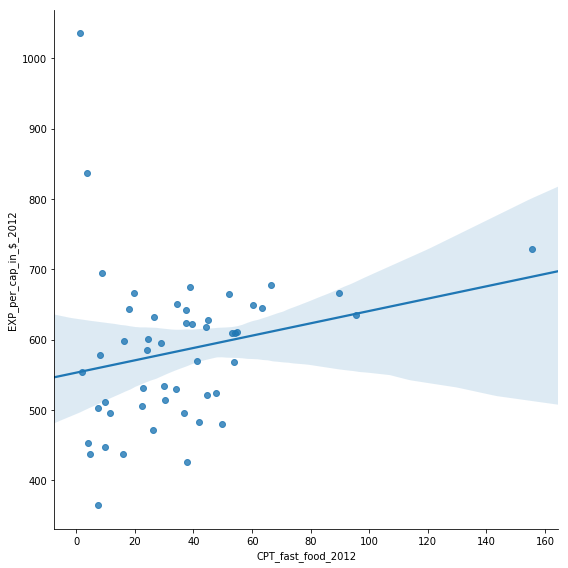

In [44]:
sns.lmplot(x='CPT_fast_food_2012', y='EXP_per_cap_in_$_2012', data=df_ff_merged, size=8)

**What about relationship between Expenditure and Obesity**

In [45]:
df_health = pd.read_excel(path_atlas, sheet_name='HEALTH')
df_obesity = df_health[['State', 'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13']].copy()
df_obesity.rename(columns={'PCT_OBESE_ADULTS08':'PCT_obese_adults_2008', \
                           'PCT_OBESE_ADULTS13':'PCT_obese_adults_2013'}, inplace=True)
df_obesity_grouped = df_obesity.groupby('State', as_index=False).median()
df_obesity_grouped.head()

,State,PCT_obese_adults_2008,PCT_obese_adults_2013
0,AK,30.9,30.6
1,AL,33.2,35.5
2,AR,31.3,35.8
3,AZ,26.6,29.6
4,CA,24.4,23.8


**Merging relevant data**

In [46]:
df_ff_merged['PCT_obese_adults_2013'] = df_obesity_grouped['PCT_obese_adults_2013']
#df_ff_merged = df_ff_merged.merge(df_obesity_grouped[['State','PCT_obese_adults_2013']], how='inner', on='State')

In [47]:
df_ff_merged.head()

,State,CPT_fast_food_2009,CPT_fast_food_2012,CPT_fast_food_2014,EXP_per_cap_in_$_2012,PCT_obese_adults_2013
0,AK,10.630459,9.766568,9.190640,511.480788,30.6
1,AL,38.254782,38.744833,39.071534,674.802720,35.5
2,AR,39.410640,39.492881,39.547708,622.675288,35.8
3,AZ,8.143672,8.035669,7.963666,577.718809,29.6
4,CA,37.328614,37.445887,37.524070,642.487457,23.8


In [48]:
df_ff_merged.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CPT_fast_food_2009,51.0,34.598978,26.893281,1.236010,16.241758,33.461105,45.160927,150.906377
CPT_fast_food_2012,51.0,35.140058,27.582294,1.258413,16.033779,33.967102,46.300667,155.660244
CPT_fast_food_2014,51.0,35.500777,28.065530,1.273348,15.895126,34.304433,47.701404,158.829488
EXP_per_cap_in_$_2012,51.0,583.701111,110.740146,364.112002,508.370802,595.643837,642.729104,1035.391608
PCT_obese_adults_2013,51.0,29.762745,3.949479,20.500000,27.550000,30.000000,32.350000,36.850000


# Observations:  
If we combine the obesity data of counties in their states, we get values which are very close to the average. This can be seen in the **small standard deviation** of the description frame. That means working with data on state level does not make much sense. **We lose to much information resolution on the way.**

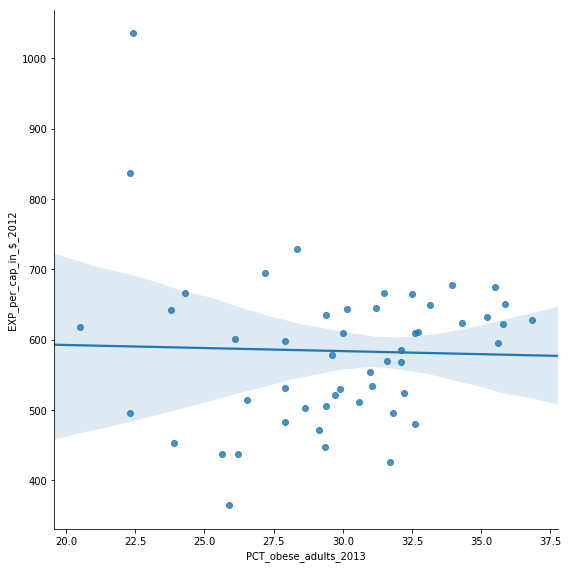

In [49]:
sns.lmplot(x='PCT_obese_adults_2013', y='EXP_per_cap_in_$_2012', data=df_ff_merged, size=8)